In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from grav_lens.testing import *
from grav_lens.utils import get_datasets, old_get_datasets

2024-09-02 12:11:21.224227: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-02 12:11:21.237898: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-02 12:11:21.366332: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-02 12:11:21.375058: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-02 12:11:21.430554: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

In [2]:
HOME = os.path.join("..","..","data")

In [3]:
# Define the list of dataset sizes to test
max_files_list = [100, 500, 1000, 5000, 10000, 20000, 50000, 60000, 77016]

# Measure efficiency of the dataset loader for Classic Generators
print("Classic Generators in Tensors after loading numpy arrays")
classic_metrics = measure_efficiency(old_get_datasets, data_index=DATA_INDEX, max_files_list=max_files_list, home=HOME)
print_efficiency_report(classic_metrics)

save_to_csv(classic_metrics, 'classic_generators_efficiency.csv')

# Measure efficiency of the dataset loader for Numpy Arrays Generators
print("Generator in Numpy Arrays")
numpy_metrics = measure_efficiency(get_datasets, data_index=DATA_INDEX, max_files_list=max_files_list, home=HOME)
print_efficiency_report(numpy_metrics)
save_to_csv(numpy_metrics, 'numpy_arrays_efficiency.csv')



Classic Generators in Tensors after loading numpy arrays
Loading 100 files...
Using data folder: ../../data/4
Time: 0.11 seconds, Memory: 552.47 MB

Loading 500 files...
Using data folder: ../../data/4
Time: 0.13 seconds, Memory: 590.74 MB

Loading 1000 files...
Using data folder: ../../data/4
Time: 0.17 seconds, Memory: 636.21 MB

Loading 5000 files...
Using data folder: ../../data/4
Time: 7.42 seconds, Memory: 988.09 MB

Loading 10000 files...
Using data folder: ../../data/4
Time: 10.21 seconds, Memory: 1354.70 MB

Loading 20000 files...
Using data folder: ../../data/4
Time: 19.08 seconds, Memory: 2308.14 MB

Loading 50000 files...
Using data folder: ../../data/4
Time: 68.44 seconds, Memory: 4951.33 MB

Loading 60000 files...
Using data folder: ../../data/4
Time: 98.67 seconds, Memory: 5838.47 MB

Loading 77016 files...
Using data folder: ../../data/4
Time: 136.13 seconds, Memory: 7277.20 MB

Efficiency Report:
Max Files: 100 -> Time: 0.11 seconds, Memory: 552.47 MB
Max Files: 500 ->

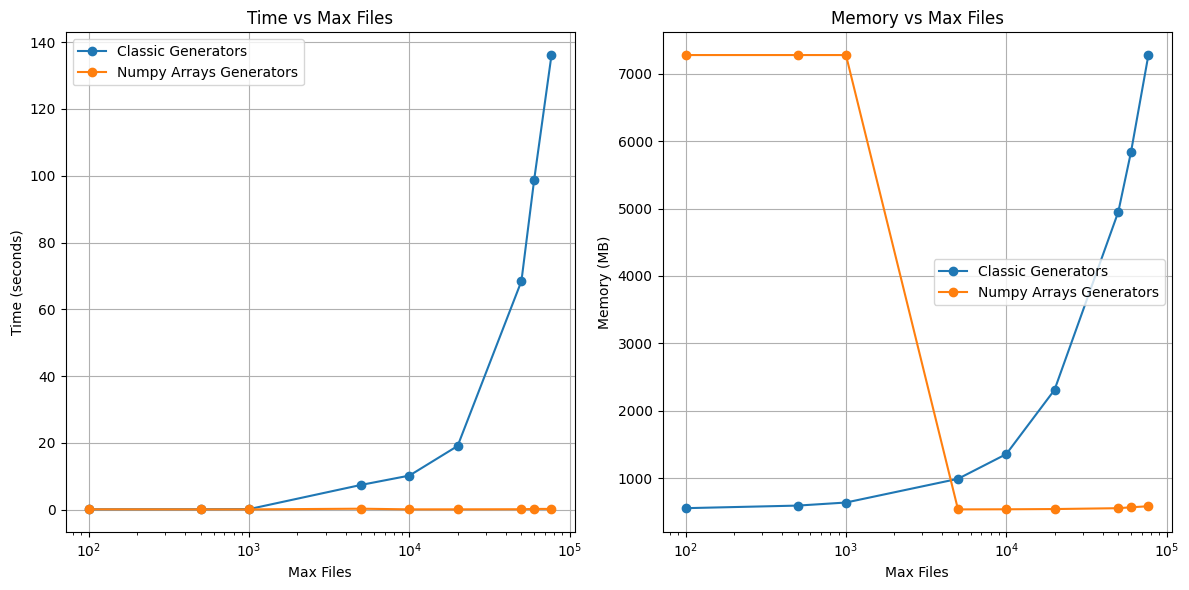

In [4]:
# Convert lists to DataFrames for plotting
df_classic = pd.DataFrame(classic_metrics)
df_numpy = pd.DataFrame(numpy_metrics)

# Plot and save the efficiency metrics
plot_efficiency(df_classic, df_numpy)